In [9]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

# === 설정 ===
resolution = 100
cell_size = mp.Vector3(3, 3, 0)
fcen = 1.75       # Gaussian source 중심 주파수
df = 3.3          # Gaussian source 대역폭
nfreq = 300

field_component = mp.Ex  # 원하는 필드 성분

# === 측정할 파장 범위 (0.4 ~ 0.7 μm) ⇒ 주파수로 변환 ===
lambda_min = 0.4
lambda_max = 0.7
fmin = 1 / lambda_max   # ≈ 1.4286
fmax = 1 / lambda_min   # = 2.5
fcen_dft = 0.5 * (fmin + fmax)
df_dft = fmax - fmin

# === 소스 위치 ===
source_center = mp.Vector3(0, 0, 0)
sources = [
    mp.Source(
        src=mp.GaussianSource(frequency=fcen, fwidth=df),
        component=field_component,
        center=source_center,
        size=mp.Vector3(0, 0)
    )
]

-----------
Initializing structure...
time for choose_chunkdivision = 0.000121117 s
Working in 2D dimensions.
Computational cell is 3 x 3 x 0 with resolution 100
time for set_epsilon = 0.0454419 s
-----------
run 0 finished at t = 50.0 (10000 timesteps)


<Axes: xlabel='X', ylabel='Y'>

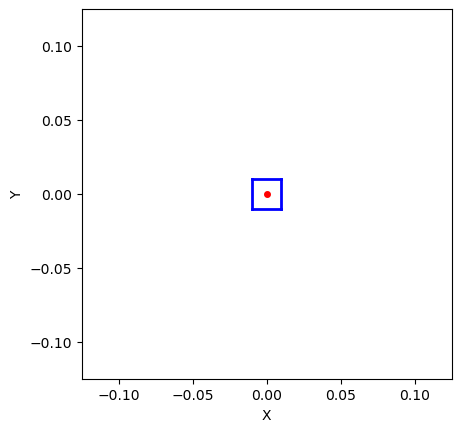

In [12]:
pml_layers = [mp.PML(0.3)]


# === 시뮬레이션 ===
sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    default_material=mp.Medium(index=1.0),
    sources=sources,
    resolution=resolution
)

offset = 0.01
flux_size = 0.02
source_center = mp.Vector3(0, 0)

flux_box = sim.add_flux(
    fcen, df, nfreq,
    
    # x1
    mp.FluxRegion(center=source_center - mp.Vector3(offset, 0, 0),
                  size=mp.Vector3(0, flux_size), weight=-1),
    # x2
    mp.FluxRegion(center=source_center + mp.Vector3(offset, 0, 0),
                  size=mp.Vector3(0, flux_size)),
    # y1
    mp.FluxRegion(center=source_center - mp.Vector3(0, offset, 0),
                  size=mp.Vector3(flux_size, 0), weight=-1),
    # y2
    mp.FluxRegion(center=source_center + mp.Vector3(0, offset, 0),
                  size=mp.Vector3(flux_size, 0))
)

sim.run(until=50)
P_air = mp.get_fluxes(flux_box)
wavelengths = 1 / np.array(mp.get_flux_freqs(flux_box))
# plt.plot(wavelengths, P_air)
sim.plot2D(output_plane=mp.Volume(center = mp.Vector3(0,0,0), size = mp.Vector3(0.25,0.25,0)))

In [16]:
import subprocess

input_path = "/home/m2ni/EIDL/Tool/Meep/LGD/Meep code/OLED structure/Layer by Layer check/OLED_2D_movie_monitor_TE.mpg"
output_path = "/home/m2ni/EIDL/Tool/Meep/LGD/Meep code/OLED structure/Layer by Layer check/OLED_2D_movie_monitor_TE.mp4"

# ffmpeg 명령어 실행
subprocess.run([
    "ffmpeg", "-i", input_path,
    "-c:v", "libx264",
    "-crf", "23",
    "-preset", "veryfast",
    output_path
])


ffmpeg version 7.1.1 Copyright (c) 2000-2025 the FFmpeg developers
  built with gcc 13.3.0 (conda-forge gcc 13.3.0-2)
  configuration: --prefix=/home/m2ni/miniconda3/envs/mp --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1743376049581/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1743376049581/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1743376049581/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1743376049581/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --enable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --disable-gnutls --enable-libvpx --enable-libass --enable-pthreads --enable-alsa --enable-libpulse --enable-vaapi --enable-libopenvino --enable-gpl --enable-libx264 --enable-libx265 --enable-libmp3lame

CompletedProcess(args=['ffmpeg', '-i', '/home/m2ni/EIDL/Tool/Meep/LGD/Meep code/OLED structure/Layer by Layer check/OLED_2D_movie_monitor_TE.mpg', '-c:v', 'libx264', '-crf', '23', '-preset', 'veryfast', '/home/m2ni/EIDL/Tool/Meep/LGD/Meep code/OLED structure/Layer by Layer check/OLED_2D_movie_monitor_TE.mp4'], returncode=0)

(0.4, 0.7)

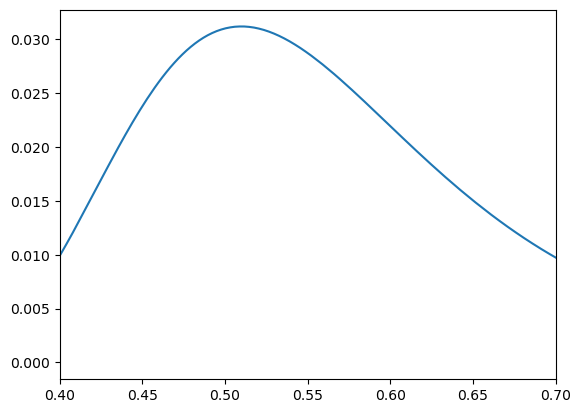

In [14]:
plt.plot(wavelengths, P_air)
plt.xlim(0.4, 0.7)

-----------
Initializing structure...
time for choose_chunkdivision = 4.88758e-05 s
Working in 2D dimensions.
Computational cell is 6 x 0.01 x 0 with resolution 100
time for set_epsilon = 0.000906944 s
-----------
run 0 finished at t = 100.0 (20000 timesteps)


/home/m2ni/miniconda3/envs/mp/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/m2ni/miniconda3/envs/mp/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


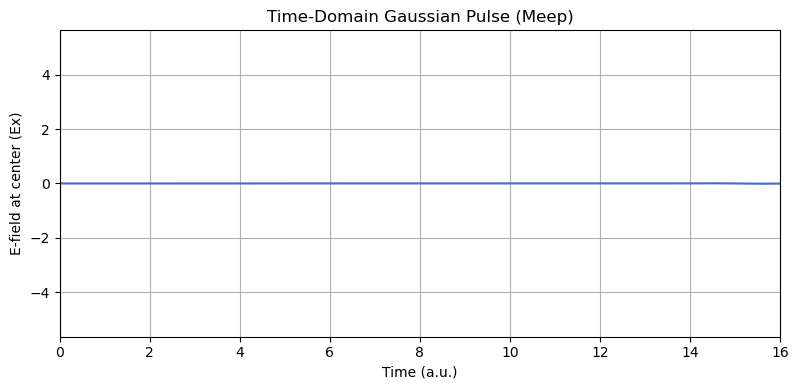

In [3]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

# === 시뮬레이션 파라미터 ===
resolution = 100
cell_size = mp.Vector3(6, 0, 0)  # 1D 시뮬레이션
pml_layers = [mp.PML(1.0)]
fcen = 1.55         # 중심 주파수 (1/μm)
fwidth = fcen*0.2	       # 대역폭 (주파수 도메인에서 Gaussian의 폭)
sim_time = 100      # 총 시뮬레이션 시간

# === Gaussian Source ===
sources = [mp.Source(
    src=mp.GaussianSource(frequency=fcen, fwidth=fwidth),
    component=mp.Ex,
    center=mp.Vector3(0, 0, 0),
    size=mp.Vector3(0, 0, 0)
)]

# === 시뮬레이션 생성 ===
sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    resolution=resolution,
    sources=sources,
    default_material=mp.Medium(index=1.0)
)

# === 시간에 따라 E 필드 기록 ===
time_data = []
field_data = []

def record_field(sim):
    time_data.append(sim.meep_time())
    field_data.append(sim.get_field_point(mp.Ex, mp.Vector3(0, 0)))

# === 실행 (매 0.1 단위 시간마다 기록) ===
sim.run(mp.at_every(0.01, record_field), until=sim_time)

time_fs = np.array(time_data) * 3.33

# === 결과 시각화 ===
plt.figure(figsize=(8,4))
plt.plot(time_fs, field_data, color='royalblue')
plt.xlabel("Time (a.u.)")
plt.ylabel("E-field at center (Ex)")
plt.title("Time-Domain Gaussian Pulse (Meep)")
plt.grid(True)
plt.tight_layout()
plt.xlim(0, 16)
plt.show()


In [67]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio  # 이미지 저장용

# === 파라미터 ===
resolution = 50
cell = mp.Vector3(10, 10, 0)
fcen = 2.0
fwidth = 1.0
sim_time = 40

# === Gaussian source ===
sources = [mp.Source(
    src=mp.GaussianSource(frequency=fcen, fwidth=fwidth),
    component=mp.Ex,
    center=mp.Vector3(0, 0)
)]

# === 시뮬레이션 생성 ===
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=[mp.PML(1.0)],
    resolution=resolution,
    sources=sources,
    default_material=mp.Medium(index=1.0)
)

# === GIF용 프레임 저장 리스트 ===
frames = []

def save_frame(sim):
    fig = plt.figure(dpi=100)
    sim.plot2D(fields=mp.Ex)
    plt.title(f"time = {sim.meep_time():.2f}")
    plt.axis('off')
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)
    plt.close()

# === 실행 및 프레임 수집 ===
sim.run(mp.at_every(0.5, save_frame), until=sim_time)

# === GIF 저장 ===
imageio.mimsave("gaussian_pulse.gif", frames, duration=0.2)
print("✅ GIF 저장 완료: gaussian_pulse.gif")


-----------
Initializing structure...
time for choose_chunkdivision = 0.000202894 s
Working in 2D dimensions.
Computational cell is 10 x 10 x 0 with resolution 50
time for set_epsilon = 0.137524 s
-----------
Meep progress: 9.0/40.0 = 22.5% done in 4.1s, 14.0s to go
on time step 900 (time=9), 0.00452891 s/step
Meep progress: 24.41/40.0 = 61.0% done in 8.1s, 5.2s to go
on time step 2442 (time=24.42), 0.00259428 s/step
Meep progress: 39.5/40.0 = 98.8% done in 12.1s, 0.2s to go
on time step 3950 (time=39.5), 0.00266143 s/step
run 0 finished at t = 40.0 (4000 timesteps)
✅ GIF 저장 완료: gaussian_pulse.gif


-----------
Initializing structure...
time for choose_chunkdivision = 0.000138044 s
Working in 2D dimensions.
Computational cell is 3 x 3 x 0 with resolution 100
time for set_epsilon = 0.0477469 s
-----------
run 0 finished at t = 50.0 (10000 timesteps)


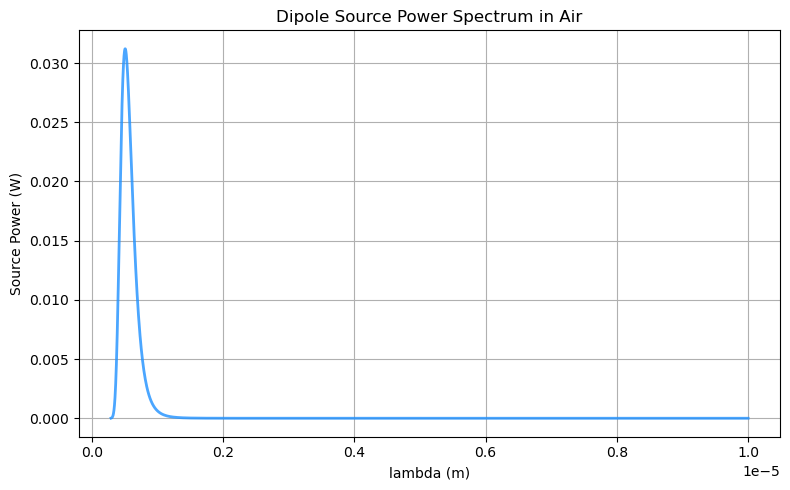

In [13]:
# === 시뮬레이션 정의 ===
sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    default_material=mp.Medium(index=1.0),
    sources=sources,
    resolution=resolution
)
# === Flux 모니터 박스 정의 ===
offset = 0.01
flux_size = 0.02

flux_box = sim.add_flux(
    fcen, df, nfreq,

    # x1
    mp.FluxRegion(center=source_center - mp.Vector3(offset, 0, 0),
                  size=mp.Vector3(0, flux_size), weight=-1),
    # x2
    mp.FluxRegion(center=source_center + mp.Vector3(offset, 0, 0),
                  size=mp.Vector3(0, flux_size)),
    # y1
    mp.FluxRegion(center=source_center - mp.Vector3(0, offset, 0),
                  size=mp.Vector3(flux_size, 0), weight=-1),
    # y2
    mp.FluxRegion(center=source_center + mp.Vector3(0, offset, 0),
                  size=mp.Vector3(flux_size, 0))
)

# === 시뮬레이션 실행 ===
sim.run(until=50)

# === 데이터 추출 및 파장 변환 ===
P_air = np.array(mp.get_fluxes(flux_box))              # power [W] at each frequency
frequencies = np.array(mp.get_flux_freqs(flux_box))    # frequency [1/μm]
wavelengths = 1 / frequencies                          # → μm

# === 파장 오름차순 정렬
sort_idx = np.argsort(wavelengths)
wavelengths = wavelengths[sort_idx]
P_air = P_air[sort_idx]

# === 결과 플롯 ===
plt.figure(figsize=(8, 5))
plt.plot(wavelengths * 1e-6, P_air, linewidth=2, color='dodgerblue', alpha=0.8)
plt.xlabel("lambda (m)")
plt.ylabel("Source Power (W)")
plt.title("Dipole Source Power Spectrum in Air")
plt.grid(True)
plt.tight_layout()
plt.show()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000179052 s
Working in 2D dimensions.
Computational cell is 3 x 3 x 0 with resolution 100
time for set_epsilon = 0.0492079 s
-----------
field decay(t = 50.005): 24312.22735566887 / 24312.22735566887 = 1.0
on time step 12740 (time=63.7), 0.000313978 s/step
field decay(t = 100.01): 2.107158101478683e-07 / 24312.22735566887 = 8.667071390262225e-12
run 0 finished at t = 100.01 (20002 timesteps)


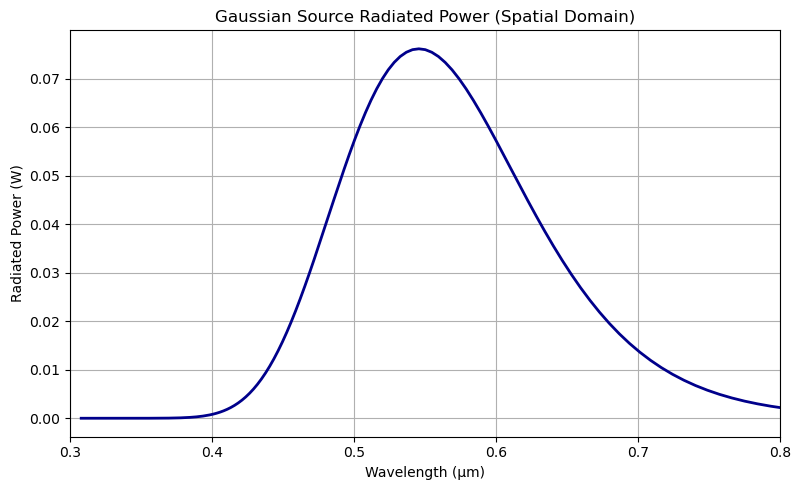

In [ ]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

# === 시뮬레이션 파라미터 ===
resolution = 100
cell_size = mp.Vector3(3, 3, 0)
pml_layers = [mp.PML(0.5)]
fcen = 1.75             # 중심 주파수 (1/μm)
fwidth = 2.0            # 대역폭 (standard deviation)
nfreq = 200

# 측정할 주파수 대역 설정 (fcen 중심으로 ±1.5 정도로 설정)
df = 3.0
fmin = fcen - df / 2
fmax = fcen + df / 2

# === 소스 ===
source_center = mp.Vector3(0, 0)
sources = [mp.Source(
    src=mp.GaussianSource(frequency=fcen, fwidth=fwidth),
    component=mp.Ex,
    center=source_center,
    size=mp.Vector3(0, 0)
)]

# === 시뮬레이션 정의 ===
sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    resolution=resolution,
    sources=sources,
    default_material=mp.Medium(index=1.0)
)

# === 박스 모니터 설정 ===
offset = 0.01
flux_size = 0.02

flux_box = sim.add_flux(
    fcen, df, nfreq,
    mp.FluxRegion(center=source_center - mp.Vector3(offset, 0), size=mp.Vector3(0, flux_size), weight=-1),  # x1
    mp.FluxRegion(center=source_center + mp.Vector3(offset, 0), size=mp.Vector3(0, flux_size)),             # x2
    mp.FluxRegion(center=source_center - mp.Vector3(0, offset), size=mp.Vector3(flux_size, 0), weight=-1),  # y1
    mp.FluxRegion(center=source_center + mp.Vector3(0, offset), size=mp.Vector3(flux_size, 0))              # y2
)

# === 실행 ===
sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ex, source_center, 1e-6))

# === 결과: 시간 영역 측정값 → 주파수 & 파장 변환 ===
flux_freqs = mp.get_flux_freqs(flux_box)  # [1/μm]
flux_power = mp.get_fluxes(flux_box)      # Power [W]

# === 파장으로 변환 (μm)
wavelengths = 1 / np.array(flux_freqs)

# === 시각화 (Spatial Domain - Wavelength)
plt.figure(figsize=(8, 5))
plt.plot(wavelengths, flux_power, color='darkblue', lw=2)
plt.xlabel("Wavelength (μm)")
plt.ylabel("Radiated Power (W)")
plt.title("Gaussian Source Radiated Power (Spatial Domain)")
plt.grid(True)
plt.tight_layout()
plt.xlim(0.3, 0.8)
plt.show()


In [135]:
f = 4.28275e+14
T = 1 / f

print(T)

2.3349483392679936e-15


<Axes: xlabel='X', ylabel='Y'>

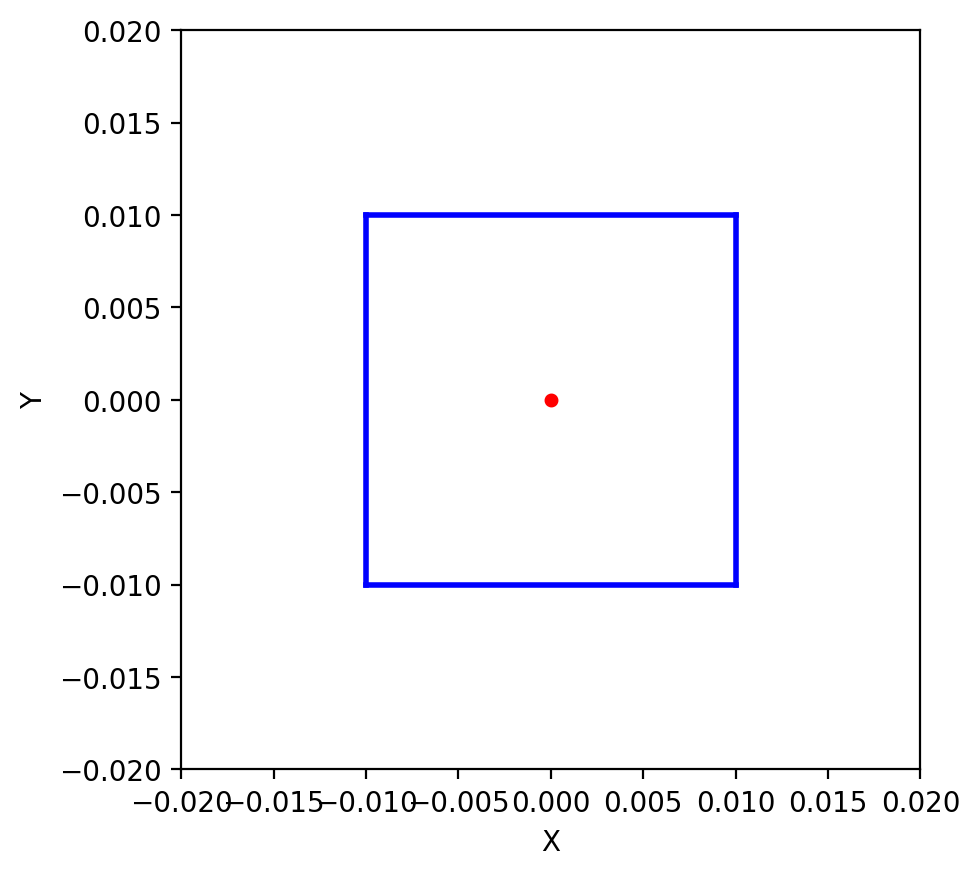

In [134]:
fig = plt.figure(dpi=200)
ax = plt.gca()

sim.plot2D(
    output_plane=mp.Volume(center=mp.Vector3(0,0,0), size=mp.Vector3(0.04, 0.04, 0)),
    # eps_parameters={'cmap': 'coolwarm', 'alpha': 0.8},   # 투명도와 컬러맵
    ax=ax
)

In [43]:
# === 경계 (PML) ===
pml_layers = [mp.PML(1)]

# === 시뮬레이션 ===
sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    default_material=mp.Medium(index=1.0),
    sources=sources,
    resolution=resolution
)

offset = 0.01
flux_size = 0.02

# === x1 (왼쪽 세로 라인) ===
x1_dft = sim.add_dft_fields(
    [field_component],
    fcen_dft - df_dft / 2, df_dft, nfreq,
    center=source_center - mp.Vector3(offset, 0, 0),
    size=mp.Vector3(0, flux_size, 0)
)

# === x2 (오른쪽 세로 라인) ===
x2_dft = sim.add_dft_fields(
    [field_component],
    fcen_dft - df_dft / 2, df_dft, nfreq,
    center=source_center + mp.Vector3(offset, 0, 0),
    size=mp.Vector3(0, flux_size, 0)
)

# === y1 (아래쪽 가로 라인) ===
y1_dft = sim.add_dft_fields(
    [field_component],
    fcen_dft - df_dft / 2, df_dft, nfreq,
    center=source_center - mp.Vector3(0, offset, 0),
    size=mp.Vector3(flux_size, 0, 0)
)

# === y2 (위쪽 가로 라인) ===
y2_dft = sim.add_dft_fields(
    [field_component],
    fcen_dft - df_dft / 2, df_dft, nfreq,
    center=source_center + mp.Vector3(0, offset, 0),
    size=mp.Vector3(flux_size, 0, 0)
)


In [44]:
# === 실행 ===
# sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, source_center, 1e-6))
sim.run(until = 50)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000189066 s
Working in 2D dimensions.
Computational cell is 3 x 3 x 0 with resolution 100
time for set_epsilon = 0.0490861 s
-----------
Meep progress: 49.455/50.0 = 98.9% done in 4.0s, 0.0s to go
on time step 9891 (time=49.455), 0.000404426 s/step
run 0 finished at t = 50.0 (10000 timesteps)


Text(0, 0.01, 'y2')

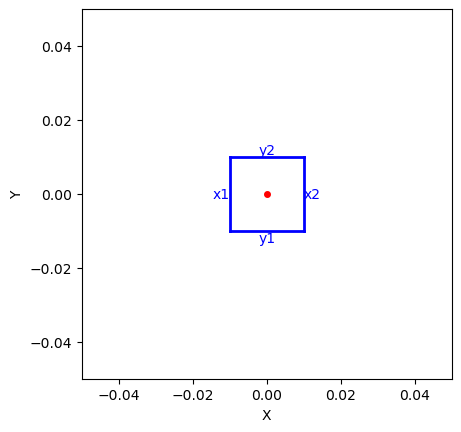

In [45]:
sim.plot2D(
    output_plane=mp.Volume(center=mp.Vector3(0,0,0), size = mp.Vector3(0.1,0.1,0))
)

cx, cy = 0, 0
offset = 0.01

# 이름 추가 (텍스트 라벨)
plt.text(cx - offset, cy, "x1", color="blue", fontsize=10, ha='right', va='center')
plt.text(cx + offset, cy, "x2", color="blue", fontsize=10, ha='left', va='center')
plt.text(cx, cy - offset, "y1", color="blue", fontsize=10, ha='center', va='top')
plt.text(cx, cy + offset, "y2", color="blue", fontsize=10, ha='center', va='bottom')

In [46]:
# === 파워 계산 ===
x1_power = [np.sum(np.abs(sim.get_dft_array(x1_dft, field_component, i))) for i in range(nfreq)]
x2_power = [np.sum(np.abs(sim.get_dft_array(x2_dft, field_component, i))) for i in range(nfreq)]
y1_power = [np.sum(np.abs(sim.get_dft_array(y1_dft, field_component, i))) for i in range(nfreq)]
y2_power = [np.sum(np.abs(sim.get_dft_array(y2_dft, field_component, i))) for i in range(nfreq)]

# === 총합 power 계산 ===
total_power = np.array(x1_power) + np.array(x2_power) + np.array(y1_power) + np.array(y2_power)

# === 주파수 → 파장 변환 ===
frequencies = np.linspace(fcen_dft - df_dft / 2, fcen_dft + df_dft / 2, nfreq)
wavelengths = 1 / frequencies


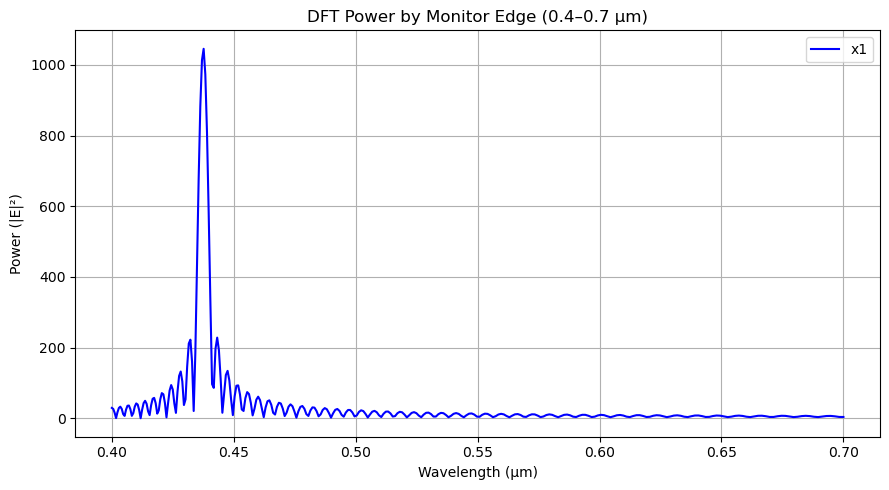

In [47]:
plt.figure(figsize=(9, 5))
plt.plot(wavelengths, x1_power, label='x1', color='blue')
# plt.plot(frequencies, x2_power, label='x2', color='red')
# plt.plot(frequencies, y1_power, label='y1', color='green')
# plt.plot(frequencies, y2_power, label='y2', color='orange')
plt.xlabel("Wavelength (μm)")

# plt.ylabel("Power (|E|²)")
plt.ylabel("Power (|E|²)")
plt.title("DFT Power by Monitor Edge (0.4–0.7 μm)")
# plt.xlim(0.4, 0.7)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


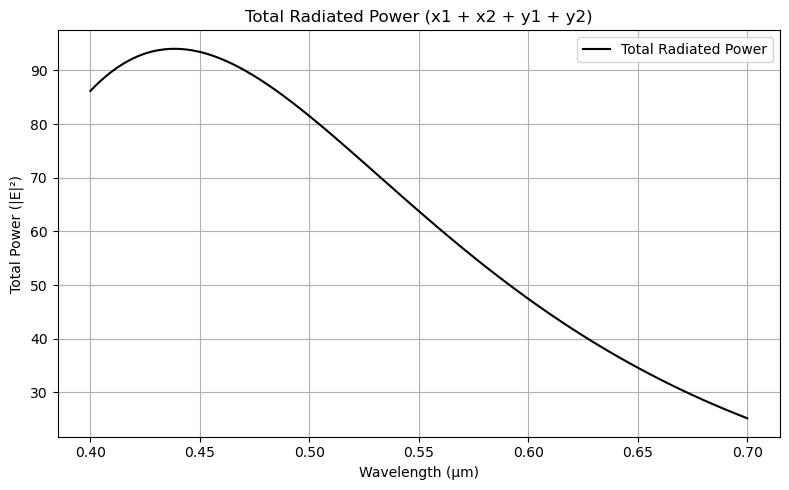

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(wavelengths, total_power, label='Total Radiated Power', color='black')
plt.xlabel("Wavelength (μm)")
plt.ylabel("Total Power (|E|²)")
plt.title("Total Radiated Power (x1 + x2 + y1 + y2)")
# plt.xlim(0.4, 0.7)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


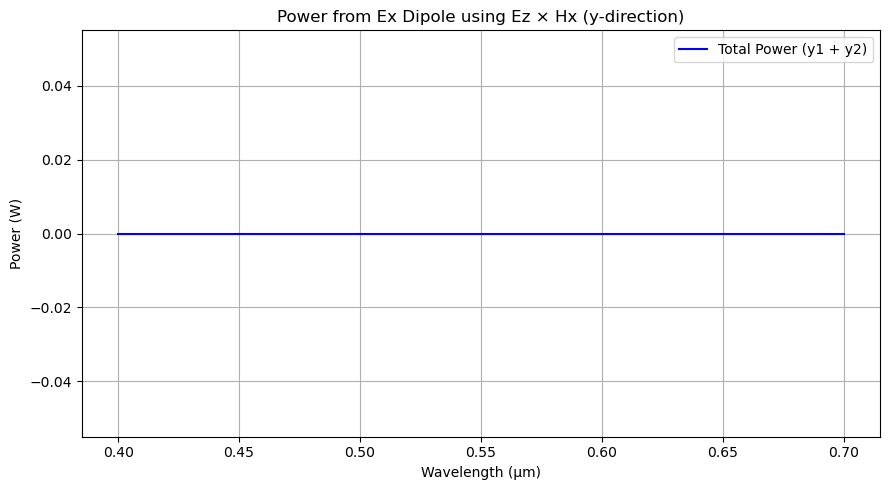

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# === 파장 계산 ===
frequencies = np.linspace(fcen_dft - df_dft / 2, fcen_dft + df_dft / 2, nfreq)
wavelengths = 1 / frequencies

# === y1 방향: Ez × Hx*
y1_power = []
for i in range(nfreq):
    E = sim.get_dft_array(y1_dft, mp.Ez, i)     # 전기장 z 성분
    H = sim.get_dft_array(y1_dft, mp.Hx, i)     # 자기장 x 성분
    S = 0.5 * np.real(E * np.conj(H))           # y 방향 Poynting vector
    power = np.sum(S)
    y1_power.append(power)

# === y2 방향: Ez × Hx*
y2_power = []
for i in range(nfreq):
    E = sim.get_dft_array(y2_dft, mp.Ez, i)
    H = sim.get_dft_array(y2_dft, mp.Hx, i)
    S = 0.5 * np.real(E * np.conj(H))
    power = np.sum(S)
    y2_power.append(power)

# === 총합
total_y_power = np.array(y1_power) + np.array(y2_power)

# === 플롯 ===
plt.figure(figsize=(9, 5))
plt.plot(wavelengths, total_y_power, label="Total Power (y1 + y2)", color="blue")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Power (W)")
plt.title("Power from Ex Dipole using Ez × Hx (y-direction)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [27]:
source_flux = sim.add_flux(
    fcen_dft, df_dft, nfreq,
    mp.FluxRegion(center=source_center, size=mp.Vector3(0, 0.02))
)
sim.run(until = 50)
# sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, source_center, 1e-6))
# 1) source 기준 power (단위: W)
source_power = mp.get_fluxes(source_flux)  # shape: (nfreq,)

# 2) 측정된 각 방향 필드의 절대 전력
x1_power = [
    np.sum(np.abs(sim.get_dft_array(x1_dft, field_component, i))**2) / source_power[i]
    for i in range(nfreq)
]
# (x2, y1, y2도 동일하게 정규화)

# 3) 총 전력도 정규화해서 W 단위로 만들 수 있음
total_power = np.array(x1_power) + np.array(x2_power) + np.array(y1_power) + np.array(y2_power)


on time step 20002 (time=100.01), 0.0002906 s/step
run 1 finished at t = 150.01500000000001 (30003 timesteps)


# 여기서부터 구분선

In [28]:
sim.reset_meep()

In [29]:
resolution = 100
nfreq = 100

fcen = 1.75
df = 3.3

In [30]:
air_source_center = mp.Vector3(0,0,0)
air_sources = [mp.Source(
    src=mp.GaussianSource(frequency=fcen, fwidth=df),
    component=mp.Ey,
    center=air_source_center,
    size=mp.Vector3(0,0)
)]

resolution_air = 100
sim_air = mp.Simulation(
    cell_size=mp.Vector3(1,1,0),
    default_material=mp.Medium(index=1),
    boundary_layers=pml_layers,
    sources=air_sources,
    resolution=resolution_air
)

-----------
Initializing structure...
time for choose_chunkdivision = 7.20024e-05 s
Working in 2D dimensions.
Computational cell is 1 x 1 x 0 with resolution 100
time for set_epsilon = 0.0054822 s
-----------
field decay(t = 50.005): 21454.787092491468 / 21454.787092491468 = 1.0
field decay(t = 100.01): 2.6400756492520434e-07 / 21454.787092491468 = 1.2305298756266804e-11
run 0 finished at t = 100.01 (20002 timesteps)


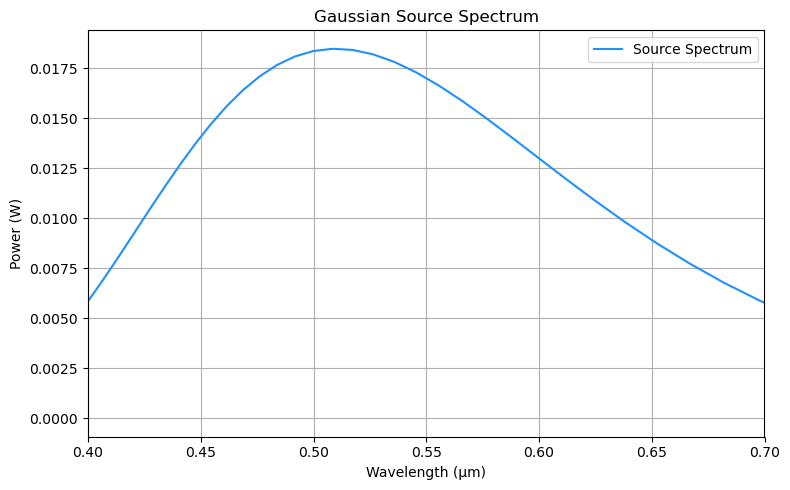

In [31]:
# --- 시뮬레이션 정의 ---
sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    default_material=mp.Medium(index=1.0),
    sources=air_sources,
    resolution=resolution
)

# --- 소스 power 측정용 flux monitor 설치 ---
flux_monitor = sim.add_flux(
    fcen, df, nfreq,
    mp.FluxRegion(center=air_source_center + mp.Vector3(0.1, 0, 0), size=mp.Vector3(0, 0.5, 0))
)

# --- 시뮬레이션 실행 ---
sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, air_source_center, 1e-6))

# --- 측정된 스펙트럼 가져오기 ---
freqs = mp.get_flux_freqs(flux_monitor)
source_power = mp.get_fluxes(flux_monitor)
wavelengths = 1 / np.array(freqs)

# --- 플롯 ---
plt.figure(figsize=(8, 5))
plt.plot(wavelengths, source_power, label="Source Spectrum", color="dodgerblue")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Power (W)")
plt.title("Gaussian Source Spectrum")
plt.grid(True)
plt.xlim(0.4, 0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
# 박스 4면
offset = 0.01
flux_size = 0.02

fmin = 1 / 0.7     # ≈ 1.4286
fmax = 1 / 0.4     # = 2.5
fcen_focus = 0.5 * (fmin + fmax)
df_focus   = fmax - fmin
nfreq = 300

# 박스 4면
x1_air = sim_air.add_flux(
    fcen_focus, df_focus, nfreq, 
    # flux x1
    mp.FluxRegion(
        center=air_source_center - mp.Vector3(offset, 0,0),
        size=mp.Vector3(0,flux_size, 0),
        # direction=mp.Y,
        weight=-1
    ),
)

x2_air = sim_air.add_flux(
    fcen_focus, df_focus, nfreq, 
    # flux x2
    mp.FluxRegion(
        center=air_source_center + mp.Vector3(offset, 0,0),
        size=mp.Vector3(0,flux_size, 0),
        # direction=mp.Y
    ),
)

y1_air = sim_air.add_flux(
    fcen_focus, df_focus, nfreq, 
    # flux y1
    mp.FluxRegion(
        center=air_source_center - mp.Vector3(0, offset, 0),
        size=mp.Vector3(flux_size, 0),
        # direction=mp.Y,
        weight=-1
    ),
)

y2_air = sim_air.add_flux(
    fcen_focus, df_focus, nfreq, 
    # flux y2
    mp.FluxRegion(
        center=air_source_center + mp.Vector3(0, offset, 0),
        size=mp.Vector3(flux_size, 0),
        # direction=mp.Y
    ),
)



In [33]:
sim_air.run(until=50)

-----------
Initializing structure...
time for choose_chunkdivision = 6.19888e-05 s
Working in 2D dimensions.
Computational cell is 1 x 1 x 0 with resolution 100
time for set_epsilon = 0.00546288 s
-----------
run 0 finished at t = 50.0 (10000 timesteps)


In [34]:
air_x1_data = mp.get_fluxes(x1_air)
air_x2_data = mp.get_fluxes(x2_air)
air_y1_data = mp.get_fluxes(y1_air)
air_y2_data = mp.get_fluxes(y2_air)

frequency_air =  mp.get_flux_freqs(x1_air)
wavelengths_air = 1 / np.array(frequency_air)

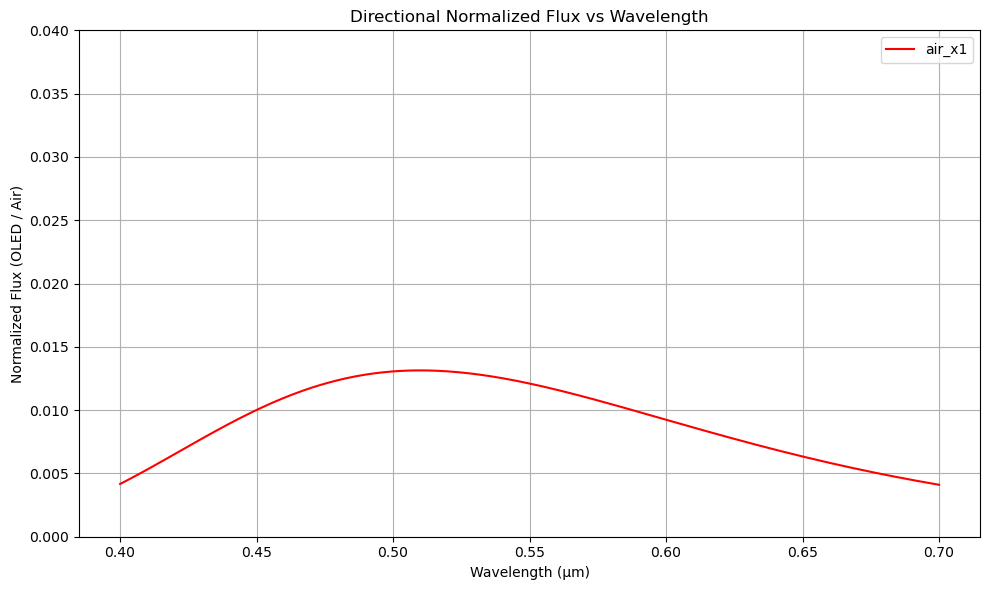

In [35]:
# 정규화된 directional flux 계산
air_x1 = np.array(air_x1_data)
air_x2 = np.array(air_x2_data)

air_y1 = np.array(air_y1_data)
air_y2 = np.array(air_y2_data)

k = air_x1+air_x2+air_y1+air_y2

plt.figure(figsize=(10, 6))
plt.plot(wavelengths_air,air_x1, label='air_x1', color='red')
# plt.plot(wavelengths_air,air_x2, label='air_x2', color='blue')
# plt.plot(wavelengths_air,air_y1, label='air_y1', color='green')
# plt.plot(wavelengths_air,air_y2, label='air_y2', color='black')
# plt.plot(wavelengths_air,k, label='x1+x2+y1+y2', color='magenta')

plt.xlabel("Wavelength (μm)")
plt.ylabel("Normalized Flux (OLED / Air)")
plt.title("Directional Normalized Flux vs Wavelength")
plt.grid(True)
plt.legend()
plt.tight_layout()
# plt.xlim([0.4, 0.7])
plt.ylim([0,0.04])
plt.show()